In [1]:
import spatialdata
import spatialdata_io

/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [2]:
path_read = "/data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutput/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918"

In [3]:
sdata = spatialdata_io.xenium(
    path=str(path_read),
    n_jobs=8,
    cells_boundaries=True,
    nucleus_boundaries=True,
    morphology_focus=True,
    cells_as_circles=True,
)
print("done")

INFO     reading                                                                                                   
         /data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutpu
         t/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918/cell_feature_matr
         ix.h5                                                                                                     
done


/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/tifffile/tifffile.py:8884: UserWarning: <tifffile.TiffPage 0 @16> reading array from closed file
  warnings.warn(


In [4]:
sdata

SpatialData object
├── Images
│     └── 'morphology_focus': DataTree[cyx] (5, 91801, 48336), (5, 45900, 24168), (5, 22950, 12084), (5, 11475, 6042), (5, 5737, 3021)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (91801, 48336), (45900, 24168), (22950, 12084), (11475, 6042), (5737, 3021)
│     └── 'nucleus_labels': DataTree[yx] (91801, 48336), (45900, 24168), (22950, 12084), (11475, 6042), (5737, 3021)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 13) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (310629, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (310629, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (288536, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (310629, 5006)
with coordinate systems:
    ▸ 'global', with elements:
        morphology_focus (Images), cell_labels (Labels), nucleus_labels (Labels), transcripts (Points), cell_boundaries (Shapes), cell_circles (Shapes), nucleus_boundar

In [7]:
write_path_zarr = "/data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutput/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918.zarr"

In [8]:
sdata.write(write_path_zarr)

INFO     The Zarr backing store has been changed from None the new file path:                                      
         /data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutpu
         t/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918.zarr             


In [9]:
sdata = spatialdata.read_zarr(write_path_zarr)
sdata

/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packag

SpatialData object, with associated Zarr store: /gpfs/gsfs10/users/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutput/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918.zarr
├── Images
│     └── 'morphology_focus': DataTree[cyx] (5, 91801, 48336), (5, 45900, 24168), (5, 22950, 12084), (5, 11475, 6042), (5, 5737, 3021)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (91801, 48336), (45900, 24168), (22950, 12084), (11475, 6042), (5737, 3021)
│     └── 'nucleus_labels': DataTree[yx] (91801, 48336), (45900, 24168), (22950, 12084), (11475, 6042), (5737, 3021)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 13) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (310629, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (310629, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (288536, 1) (2D shapes)
└── Tables
      └── 'table': AnnDa

In [10]:
adata = sdata.tables["table"]
adata

AnnData object with n_obs × n_vars = 310629 × 5006
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level', 'cell_labels'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

In [5]:
import matplotlib.pyplot as plt
import spatialdata_plot

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7972933487120337].


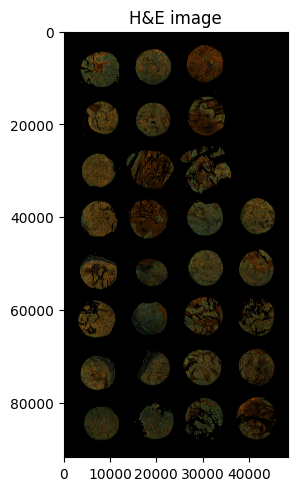

In [12]:
sdata.pl.render_images("morphology_focus").pl.show(title="H&E image")

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from spatialdata import SpatialData

from napari_spatialdata import Interactive

plt.rcParams["figure.figsize"] = (20, 20)
FILE_PATH = "/data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutput/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918.zarr" # Change this
sdata = SpatialData.read(FILE_PATH)

/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_

In [2]:
interactive = Interactive(sdata)
interactive.run()

2024-11-29 16:05:21.576 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:05:21.578 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:06:10.036 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:06:10.042 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:06:11.337 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
Traceback (most recent call last):
  File "/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/napari_spatialdata/_sdata_widgets.py", line 97, in <lambda>
    self.elements_widget.itemDoubleClicked.connect(lambda item: self._onClick(item.text()))
                                                                ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/napari_spatialdata/_sdata_widgets.p

2024-11-29 16:19:58.367 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:20:25.036 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:20:25.053 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:20:25.074 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.


(-0.5, 1076.5, 940.5, -0.5)

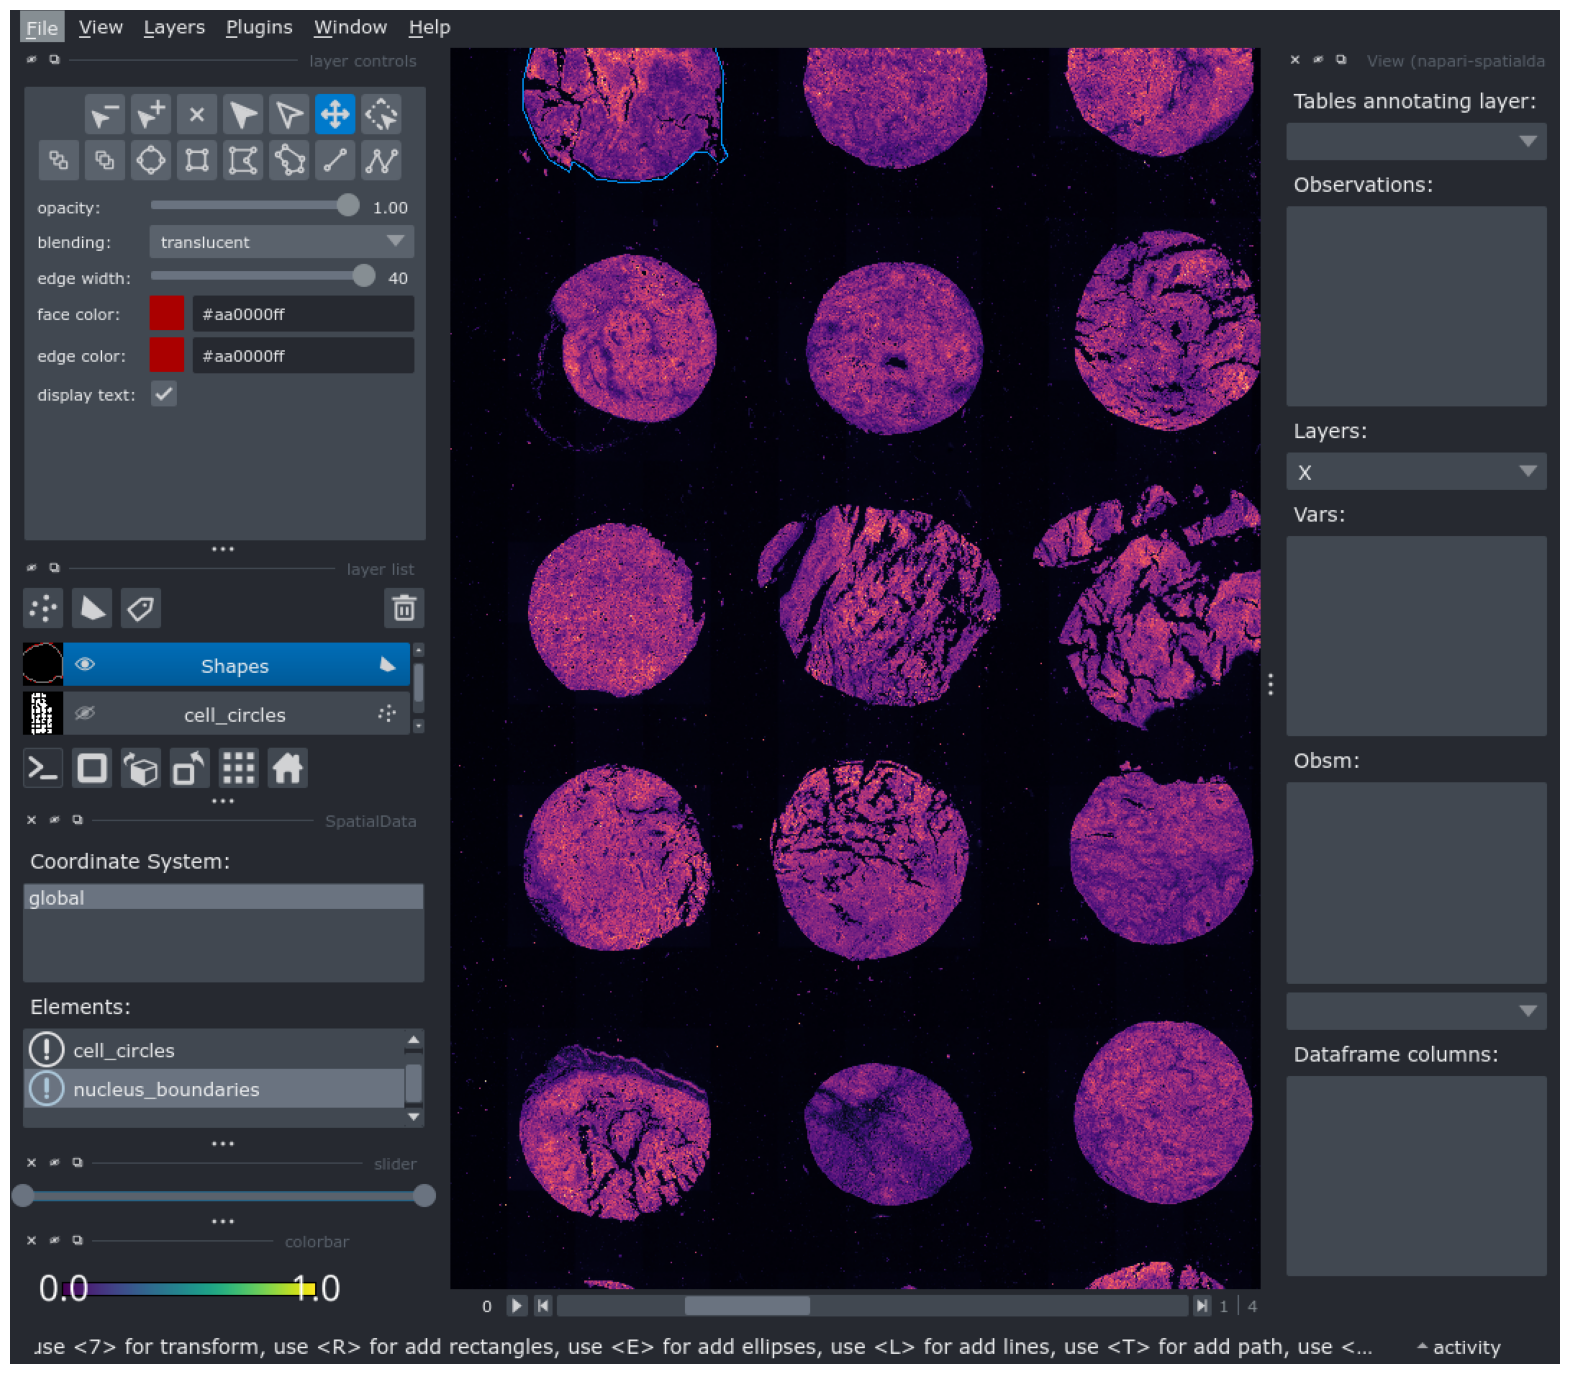

2024-11-29 16:22:24.484 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:22:24.488 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:22:34.311 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:22:34.330 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:22:34.349 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:23:20.295 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `Shapes` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
2024-11-29 16:23:22.210 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer saved


2024-11-29 16:23:45.987 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:23:45.991 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:23:45.992 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/napari/_vispy/layers/scalar_field.py:199: UserWarning: data shape (91801, 48336) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
2024-11-29 16:23:58.710 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:23:58.716 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:26:23.292 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:26:23.315 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating laye

2024-11-29 16:27:59.085 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer saved


2024-11-29 16:28:12.403 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:28:12.408 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:28:19.933 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:28:19.937 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:28:24.657 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:28:24.661 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:29:18.798 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:29:18.802 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:29:23.451 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:29:23.454 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updati

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
File /gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/napari/_qt/threads/status_checker.py:100, in StatusChecker.calculate_status(self=<napari._qt.threads.status_checker.StatusChecker object>)
     97     return
     99 try:
--> 100     res = viewer._calc_status_from_cursor()
        viewer = Viewer(camera=Camera(center=(0.0, 13650.825860826768, 12786.928646952094), zoom=0.020449810490862103, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=False, mouse_zoom=True), cursor=Cursor(position=(1.0, 9298.707510072963, 11295.472664494502), scaled=True, style=<CursorStyle.CROSS: 'cross'>, size=1.0), dims=Dims(ndim=3, ndisplay=2, order=(0, 1, 2), axis_labels=('0', '1', '2'), rollable=(True, True, True), range=(RangeTuple(start=0.0, stop=4.0, step=1.0), RangeTuple(start=0.0, stop=91800.0, step=1.0), RangeTuple

Traceback (most recent call last):
  File "/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/napari/_qt/threads/status_checker.py", line 86, in run
    self.calculate_status()
  File "/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/napari/_qt/threads/status_checker.py", line 110, in calculate_status
    self.status_and_tooltip_changed.emit(res)
                                         ^^^
UnboundLocalError: cannot access local variable 'res' where it is not associated with a value
2024-11-29 16:33:52.381 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:33:52.400 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:33:52.415 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:33:54.510 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:33:54.515 | INFO     | napar

2024-11-29 16:44:10.083 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:44:13.668 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:44:13.672 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:44:43.326 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:44:43.330 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:44:43.331 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:45:29.078 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 16:45:29.082 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
Traceback (most recent call last):
  File "/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/vispy/app/backends/_qt.py", line 496, in mousePressEvent
    self.

Traceback (most recent call last):
  File "/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/vispy/app/backends/_qt.py", line 496, in mousePressEvent
    self._vispy_mouse_press(
  File "/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/vispy/app/base.py", line 184, in _vispy_mouse_press
    ev = self._vispy_canvas.events.mouse_press(**kwargs)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/vispy/util/event.py", line 453, in __call__
    self._invoke_callback(cb, event)
  File "/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/vispy/util/event.py", line 471, in _invoke_callback
    _handle_exception(self.ignore_callback_errors,
  File "/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/vispy/util/event.py", line 469, in _invoke_callback
    cb(event)
  File "

2024-11-29 17:01:22.553 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:01:22.578 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:01:22.595 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:01:24.848 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:01:24.854 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:01:35.954 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:01:35.958 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:01:48.321 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:01:48.325 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:01:50.563 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updati

2024-11-29 17:50:42.514 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:51:26.661 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:51:26.668 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:51:29.162 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:51:29.166 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:51:32.054 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:51:32.058 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:51:34.497 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:51:34.501 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:52:22.121 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updati

2024-11-29 17:57:55.347 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:57:55.637 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:57:55.642 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:57:55.934 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:57:55.939 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:57:56.233 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:57:56.238 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:57:56.536 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:57:56.541 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 17:58:01.695 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updati

2024-11-29 18:05:50.069 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:05:50.469 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:05:50.474 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:05:56.616 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:05:56.620 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:06:03.881 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:06:03.885 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:06:51.489 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:06:51.494 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:06:54.658 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updati

2024-11-29 18:14:55.951 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:15:10.651 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:15:10.656 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:15:14.459 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:15:14.464 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:15:17.506 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:15:17.511 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:15:31.093 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:15:31.098 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:16:06.219 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updati

2024-11-29 18:21:13.276 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:21:36.259 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:21:36.265 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:21:46.463 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:21:46.467 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:21:49.233 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:21:49.237 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:21:51.980 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-11-29 18:21:51.985 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.


In [3]:
plt.imshow(interactive.screenshot())
plt.axis("off")

(-0.5, 1225.5, 940.5, -0.5)

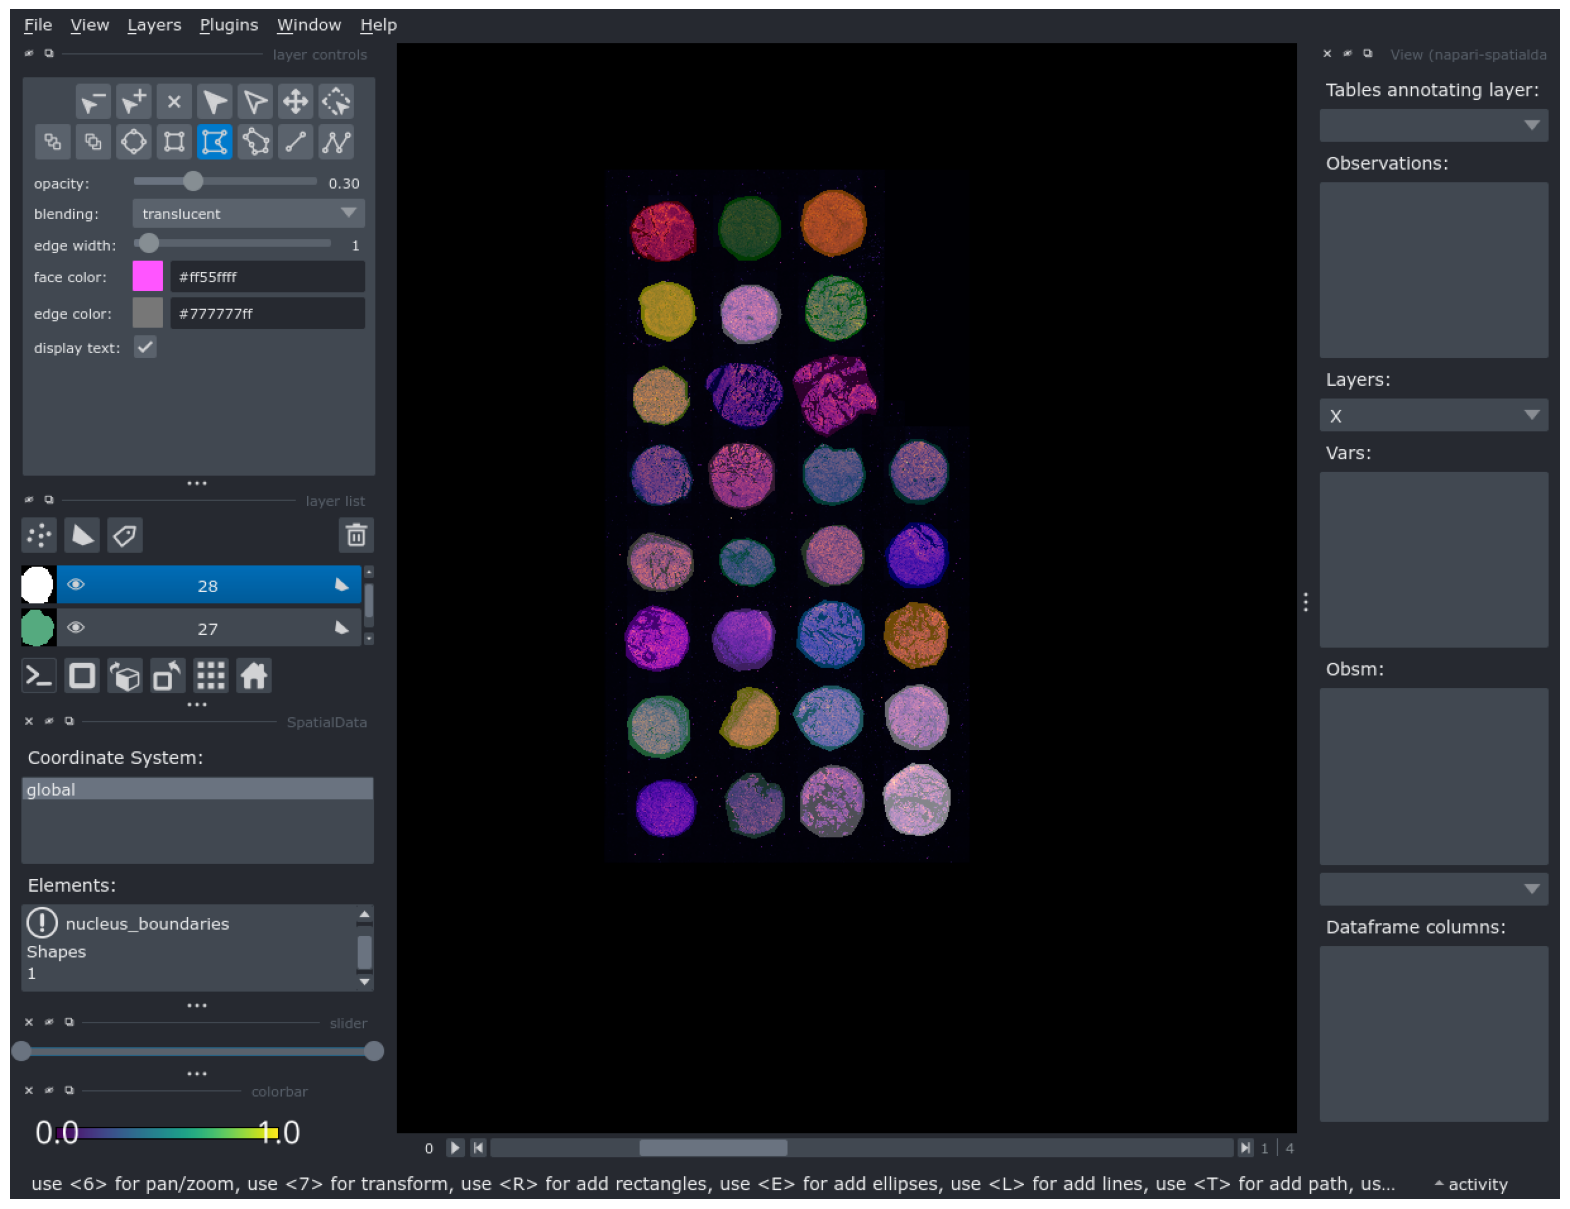

In [4]:
plt.imshow(interactive.screenshot())
plt.axis("off")

In [15]:
plt.imshow(interactive.screenshot())
plt.axis("off")

(-0.5, 1225.5, 940.5, -0.5)

In [10]:
sdata

SpatialData object, with associated Zarr store: /gpfs/gsfs10/users/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutput/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918.zarr
├── Images
│     └── 'morphology_focus': DataTree[cyx] (5, 91801, 48336), (5, 45900, 24168), (5, 22950, 12084), (5, 11475, 6042), (5, 5737, 3021)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (91801, 48336), (45900, 24168), (22950, 12084), (11475, 6042), (5737, 3021)
│     └── 'nucleus_labels': DataTree[yx] (91801, 48336), (45900, 24168), (22950, 12084), (11475, 6042), (5737, 3021)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 13) (3D points)
├── Shapes
│     ├── '1': GeoDataFrame shape: (2, 1) (2D shapes)
│     ├── '2': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── '3': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── '4': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── '5': GeoDataFrame shape: (1,

In [8]:
interactive.data()

AttributeError: 'Interactive' object has no attribute 'data'

2024-11-29 18:27:29.106 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


In [14]:
write_path_zarr = "/data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutput/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918_label.zarr"
sdata.write(write_path_zarr,overwrite=True)

INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside                                                                                         
         /data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutpu
         t/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918_label.zarr).     
         Please see the documentation of `is_self_contained()` to understand the implications of working with      
         SpatialData objects that are not self-contained.                                                          
INFO     The Zarr backing store has been changed from                                                              
         /data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutpu
         t/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_

In [1]:
import numpy as np
import pandas as pd
import spatialdata as sd
from geopandas import GeoDataFrame
from shapely import Polygon
from spatialdata.models import ShapesModel
from spatialdata.transformations import Identity
from napari_spatialdata import Interactive

/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [2]:
path_zarr_label = "/data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutput/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918_label.zarr"
sdata = sd.read_zarr(path_zarr_label)
sdata

/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packag

SpatialData object, with associated Zarr store: /gpfs/gsfs10/users/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutput/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918_label.zarr
├── Images
│     └── 'morphology_focus': DataTree[cyx] (5, 91801, 48336), (5, 45900, 24168), (5, 22950, 12084), (5, 11475, 6042), (5, 5737, 3021)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (91801, 48336), (45900, 24168), (22950, 12084), (11475, 6042), (5737, 3021)
│     └── 'nucleus_labels': DataTree[yx] (91801, 48336), (45900, 24168), (22950, 12084), (11475, 6042), (5737, 3021)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 13) (3D points)
├── Shapes
│     ├── '1': GeoDataFrame shape: (2, 1) (2D shapes)
│     ├── '2': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── '3': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── '4': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── '5': GeoDataFrame shap

In [21]:
# correcting shape "1"
interactive = Interactive(sdata)
interactive.run()

In [19]:
write_path_zarr = "/data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutput/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918_label_correct.zarr"
sdata.write(write_path_zarr,overwrite=True)

INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside                                                                                         
         /data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutpu
         t/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918_label_correct.zar
         r). Please see the documentation of `is_self_contained()` to understand the implications of working with  
         SpatialData objects that are not self-contained.                                                          
INFO     The Zarr backing store has been changed from                                                              
         /data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutpu
         t/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_

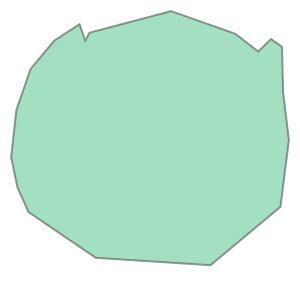

In [22]:
sdata.shapes['1'].geometry.iloc[0]

In [4]:
path_zarr_correct = "/data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutput/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918_label_correct.zarr"
sdata = sd.read_zarr(path_zarr_correct)

/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packag

In [2]:
from spatialdata import polygon_query

In [ ]:
filtered_tables = {}
for layer in range(1,2):
    polygon = sdata.shapes[str(i)].geometry.iloc[0]
    filtered_tables[str(i)] = polygon_query(sdata, polygon=polygon,target_coordinate_system = 'global')["table"]

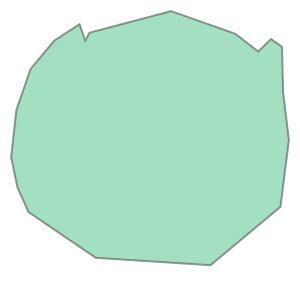

In [5]:
polygon = sdata.shapes[str(1)].geometry.iloc[0]
polygon

In [10]:
sdata.tables['uns']

{'table': AnnData object with n_obs × n_vars = 310629 × 5006
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level', 'cell_labels'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'}

In [15]:
sdata.tables['table']

{'spatialdata_attrs': {'instance_key': 'cell_id',
  'region': 'cell_circles',
  'region_key': 'region'}}

In [7]:
polygon_query(sdata, polygon=polygon,target_coordinate_system = '1')["table"]

AssertionError: elements_dict must contain at least one dict which contains at least one element

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from spatialdata import SpatialData
import spatialdata as sd
from napari_spatialdata import Interactive

path_zarr_correct = "/data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutput/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918_label_correct.zarr"
sdata = sd.read_zarr(path_zarr_correct)


/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packag

In [6]:
sdata

SpatialData object, with associated Zarr store: /gpfs/gsfs10/users/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4316/PrimaryAnalysisOutput/SCAF4316_PA_xenium/output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918_label_correct.zarr
├── Images
│     └── 'morphology_focus': DataTree[cyx] (5, 91801, 48336), (5, 45900, 24168), (5, 22950, 12084), (5, 11475, 6042), (5, 5737, 3021)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (91801, 48336), (45900, 24168), (22950, 12084), (11475, 6042), (5737, 3021)
│     └── 'nucleus_labels': DataTree[yx] (91801, 48336), (45900, 24168), (22950, 12084), (11475, 6042), (5737, 3021)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 13) (3D points)
├── Shapes
│     ├── '1': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── '2': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── '3': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── '4': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── '5': GeoDataFr

In [5]:
interactive = Interactive(sdata)

In [9]:
interactive.add_text_to_polygons(layer_name="Shapes",text_annotations ='1')

ValueError: Polygon layer 'Shapes' not found.

In [10]:
interactive.get_layer(layer_name="Shapes")

In [13]:
interactive.add_text_to_polygons(layer_name="Shapes",text_annotations =[{'1':'1'}])

ValueError: Polygon layer 'Shapes' not found.

In [14]:
sdata["Shapes"].keys()

Index(['geometry'], dtype='object')

In [19]:
sdata["Shapes"]['geometry']

0    POLYGON ((4203.563 6233.311, 5698.094 5101.091...
1    POLYGON ((11733.846 11318.961, 11292.999 10878...
Name: geometry, dtype: geometry

In [22]:
text_annotations = [{"id": 0, "text": "Annotation for Shape 1"}]
layer_name="1"
interactive.add_text_to_polygons(layer_name=layer_name, text_annotations=text_annotations)

ValueError: Polygon layer '1' not found.

In [ ]:
interactive.run()

In [2]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import os
import gzip
import numpy as np
import scanpy as sc
import squidpy as sq
import cupy as cp
import cupyx
import os
import time
import rapids_singlecell as rsc
import numpy as np
import rmm
from rmm.allocators.cupy import rmm_cupy_allocator
import cupy

rmm.reinitialize(
    managed_memory=False,  # Allows oversubscription
    pool_allocator=False,  # default is False
    devices=0,  # GPU device IDs to register. By default registers only GPU 0.
)
cp.cuda.set_allocator(rmm_cupy_allocator)
import zarr
from collections import OrderedDict
from scipy.sparse import csr_matrix
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
from scipy.sparse import csr_matrix
import scipy
import anndata
from collections import OrderedDict

In [3]:
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

In [9]:
df.g

0      A
1      B
2      C
3      D
4      E
      ..
495    F
496    G
497    H
498    I
499    J
Name: g, Length: 500, dtype: object